In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tqdm
import fitsio
import matplotlib.pyplot as plt
import healpy as hp
import glob
import hpgeom
import numpy as np
import galsim
import yaml
import requests

# from sim_match_tools import project_to_tile, sample_from_pixel
from montara.make_input_desgal import make_input_cosmos_cat

## Try to Adjust the COSMOS Catalog to get More Brighter Things

In [3]:
ratio_sim = """
18.20913, -0.87218
18.24124, -0.87216
18.28405, -0.87215
18.32686, -0.87462
18.36968, -0.87709
18.40179, -0.87708
18.42319, -0.75253
18.50882, -0.75250
18.61585, -0.81223
18.64796, -0.81221
18.69077, -0.81220
18.72288, -0.81218
18.75499, -0.83708
18.78710, -0.83706
18.80850, -0.83705
18.84061, -0.84700
18.88342, -0.84699
18.91553, -0.75731
18.94764, -0.75231
18.97975, -0.75230
19.02256, -0.69250
19.05467, -0.68751
19.09749, -0.68749
19.12959, -0.56792
19.16170, -0.56790
19.19381, -0.56789
19.21522, -0.54795
19.24733, -0.54794
19.29014, -0.54792
19.32225, -0.45824
19.35436, -0.45823
19.39717, -0.45821
19.42928, -0.45820
19.46139, -0.59268
19.50420, -0.59267
19.53631, -0.53287
19.56842, -0.53286
19.60053, -0.53285
19.62194, -0.48800
19.65404, -0.48799
19.69686, -0.48797
19.72897, -0.36840
19.76108, -0.36839
19.80389, -0.36837
19.83600, -0.36836
19.86811, -0.43310
19.90022, -0.43309
19.92162, -0.38825
19.95373, -0.38823
19.98584, -0.38822
20.02865, -0.37326
20.06076, -0.36826
20.10357, -0.36824
20.14639, -0.36823
20.18920, -0.36821
20.22131, -0.36820
20.24271, -0.29844
20.27482, -0.29843
20.30693, -0.29842
20.32834, -0.25357
20.36045, -0.24360
20.40326, -0.24358
20.43537, -0.20371
20.46748, -0.20370
20.51029, -0.20368
20.54240, -0.20367
20.57451, -0.32321
20.60662, -0.32320
20.62802, -0.26839
20.66013, -0.26838
20.70295, -0.26836
20.73506, -0.26835
20.76716, -0.34804
20.80998, -0.34802
20.84209, -0.26830
20.87420, -0.26829
20.91701, -0.26827
20.94912, -0.23339
20.97052, -0.23338
21.01334, -0.23336
21.03474, -0.21841
21.06685, -0.21839
21.10966, -0.21837
21.14177, -0.16356
21.17388, -0.16355
21.21669, -0.16353
21.24880, -0.16352
21.28091, -0.23325
21.32372, -0.23323
21.35583, -0.16846
21.38794, -0.16844
21.42005, -0.16843
21.44146, -0.16842
21.47357, -0.20826
21.51638, -0.20824
21.54849, -0.18830
21.58060, -0.18829
21.62341, -0.18827
21.65552, -0.18826
21.68763, -0.20817
21.71974, -0.20815
21.74114, -0.20815
21.77325, -0.21809
21.81607, -0.21808
21.84817, -0.17323
21.88028, -0.17322
21.92310, -0.17320
21.95521, -0.15824
21.97661, -0.15823
22.03013, -0.15821
22.06224, -0.15819
22.09435, -0.19803
22.12645, -0.19802
22.14786, -0.19801
22.17997, -0.22291
22.22278, -0.22289
22.25489, -0.18302
22.28700, -0.18301
22.32981, -0.18299
22.36192, -0.13316
22.39403, -0.13315
22.42614, -0.13313
22.44755, -0.11818
22.47966, -0.11817
22.52247, -0.11815
22.55458, -0.10319
22.58669, -0.10318
22.62950, -0.10316
22.66161, -0.09318
22.69372, -0.09317
22.73653, -0.09315
22.76864, -0.07819
22.80075, -0.07818
22.83286, -0.07817
22.85426, -0.03332
22.88637, -0.03331
22.92919, -0.03329
22.97200, -0.03576
23.03622, -0.03823
23.06833, -0.01829
23.10043, -0.01827
23.14325, -0.01826
23.17536, -0.00828
23.20747, -0.00827
23.25028, -0.00825
23.29309, -0.00325
23.33590, -0.00323
23.36801, 0.01671
23.40012, 0.01672
23.44293, 0.01674
23.47504, 0.01675
23.50715, 0.00680
23.53926, 0.00682
23.56067, 0.03672
23.59278, 0.03673
23.63559, 0.03675
23.66770, 0.07163
23.69981, 0.07165
23.74262, 0.07166
23.77473, 0.09160
23.80684, 0.09162
23.84965, 0.09164
23.88176, 0.12652
23.91387, 0.12653
23.94598, 0.12655
23.96738, 0.15644
23.98879, 0.15645
24.04230, 0.15648
24.07441, 0.18638
24.10652, 0.18639
24.14934, 0.18641
24.18144, 0.20635
24.21355, 0.20636
24.24566, 0.20638
24.26707, 0.20639
24.29918, 0.19644
24.34199, 0.19646
24.37410, 0.23632
24.40621, 0.23633
24.44902, 0.23635
24.49183, 0.23637
24.53465, 0.23639
24.57746, 0.23641
24.62027, 0.23642
24.66308, 0.23893
24.70590, 0.24144
24.74871, 0.24146
24.78082, 0.24147
"""

data = np.loadtxt(ratio_sim.split('\n'), delimiter=',', dtype=[("mag_i", "f8"), ("ratio", "f8")])

In [4]:
bes = np.array([17.        , 17.1010101 , 17.2020202 , 17.3030303 , 17.4040404 ,
        17.50505051, 17.60606061, 17.70707071, 17.80808081, 17.90909091,
        18.01010101, 18.11111111, 18.21212121, 18.31313131, 18.41414141,
        18.51515152, 18.61616162, 18.71717172, 18.81818182, 18.91919192,
        19.02020202, 19.12121212, 19.22222222, 19.32323232, 19.42424242,
        19.52525253, 19.62626263, 19.72727273, 19.82828283, 19.92929293,
        20.03030303, 20.13131313, 20.23232323, 20.33333333, 20.43434343,
        20.53535354, 20.63636364, 20.73737374, 20.83838384, 20.93939394,
        21.04040404, 21.14141414, 21.24242424, 21.34343434, 21.44444444,
        21.54545455, 21.64646465, 21.74747475, 21.84848485, 21.94949495,
        22.05050505, 22.15151515, 22.25252525, 22.35353535, 22.45454545,
        22.55555556, 22.65656566, 22.75757576, 22.85858586, 22.95959596,
        23.06060606, 23.16161616, 23.26262626, 23.36363636, 23.46464646,
        23.56565657, 23.66666667, 23.76767677, 23.86868687, 23.96969697,
        24.07070707, 24.17171717, 24.27272727, 24.37373737, 24.47474747,
        24.57575758, 24.67676768, 24.77777778, 24.87878788, 24.97979798,
        25.08080808, 25.18181818, 25.28282828, 25.38383838, 25.48484848,
        25.58585859, 25.68686869, 25.78787879, 25.88888889, 25.98989899,
        26.09090909, 26.19191919, 26.29292929, 26.39393939, 26.49494949,
        26.5959596 , 26.6969697 , 26.7979798 , 26.8989899 , 27.        ])

sims = np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.07653809e-01, 1.03841204e+00, 2.76911745e+00, 0.00000000e+00,
       3.28831880e+00, 3.51904902e+00, 4.03825037e+00, 7.90348343e+00,
       1.18840769e+01, 1.96721345e+01, 2.39988747e+01, 3.31714724e+01,
       2.85563451e+01, 3.74982499e+01, 4.64977089e+01, 6.47854901e+01,
       6.50160896e+01, 7.85731871e+01, 9.06301973e+01, 1.00091537e+02,
       1.23801642e+02, 1.46993161e+02, 1.70588093e+02, 1.58357776e+02,
       1.87375618e+02, 1.82875964e+02, 2.23258719e+02, 2.55103150e+02,
       2.82505751e+02, 3.29292229e+02, 3.26580517e+02, 3.82481666e+02,
       3.91481377e+02, 4.32902619e+02, 4.53613138e+02, 4.79573374e+02,
       5.43608876e+02, 5.89645134e+02, 6.00894210e+02, 6.19989925e+02,
       6.89274902e+02, 7.75117198e+02, 8.36555984e+02, 8.97419462e+02,
       9.57530020e+02, 1.02329796e+03, 1.12731201e+03, 1.18107740e+03,
       1.27072897e+03, 1.34612819e+03, 1.42331749e+03, 1.51158183e+03,
       1.54908047e+03, 1.61080868e+03, 1.63307621e+03, 1.54544540e+03,
       1.38679854e+03, 1.15292516e+03, 8.91477507e+02, 6.40238853e+02,
       4.25345497e+02, 2.84179583e+02, 1.78838068e+02, 1.11513957e+02,
       2.06529084e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

mdet = np.array([5.31467170e-02, 8.93317158e-02, 1.32527558e-01, 2.33619398e-01,
       3.80620956e-01, 5.78959981e-01, 8.60298346e-01, 1.24589474e+00,
       1.88297687e+00, 2.59989216e+00, 3.64337707e+00, 4.93902618e+00,
       6.63655493e+00, 8.69141055e+00, 1.12478807e+01, 1.42643527e+01,
       1.78923511e+01, 2.21985921e+01, 2.71294767e+01, 3.25963515e+01,
       3.87952941e+01, 4.57572879e+01, 5.33617916e+01, 6.18207135e+01,
       7.07400895e+01, 8.06717409e+01, 9.14770339e+01, 1.02975270e+02,
       1.15674847e+02, 1.29392806e+02, 1.44233405e+02, 1.60095778e+02,
       1.76902579e+02, 1.95252670e+02, 2.14882806e+02, 2.36126567e+02,
       2.58012837e+02, 2.82811321e+02, 3.07627220e+02, 3.35011348e+02,
       3.64138915e+02, 3.94435032e+02, 4.27401827e+02, 4.61542373e+02,
       4.98245496e+02, 5.35125925e+02, 5.76114483e+02, 6.17444762e+02,
       6.60966270e+02, 7.05790437e+02, 7.52261474e+02, 8.01137909e+02,
       8.50088749e+02, 9.00238669e+02, 9.50870981e+02, 1.00451298e+03,
       1.05906842e+03, 1.11534288e+03, 1.17368124e+03, 1.23608680e+03,
       1.30036945e+03, 1.36586565e+03, 1.43148127e+03, 1.49470867e+03,
       1.54496375e+03, 1.56250195e+03, 1.52974118e+03, 1.42174140e+03,
       1.23698916e+03, 1.00098811e+03, 7.53826701e+02, 5.32129129e+02,
       3.56857589e+02, 2.30246278e+02, 1.45224874e+02, 9.04034702e+01,
       1.67052570e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [5]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")
find = 0
cardinal = fitsio.read(fnames[find])
nside = 8
pix = int(fnames[find].split(".")[-2])
cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

hcosmos = np.histogram(cosmos["mag_i_dered"], bins=bes, density=True)[0]
hcardinal = np.histogram(cardinal["TMAG"][:, 2], bins=bes, density=True)[0]

array([-4.81181605e+01,  2.49037882e-01, -3.96914217e-04,  2.16742025e-07])

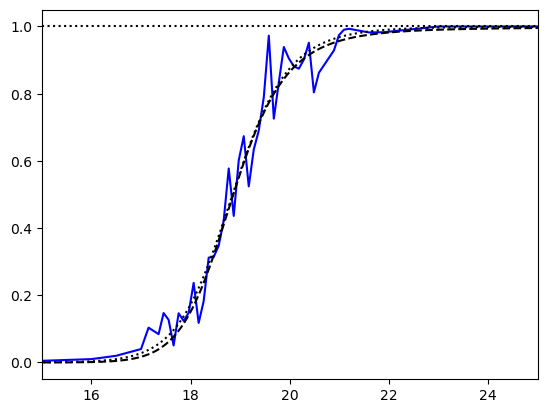

In [6]:
from scipy.optimize import curve_fit

def ratio_mag(mag, *coeffs):
    if len(coeffs) == 0:
        coeffs = [-4.81181605e+01,  2.49037882e-01, -3.96914217e-04,  2.16742025e-07]
    x = mag
    poly = np.zeros_like(x)
    for i, c in enumerate(coeffs):
        poly += c * x**(2*i)
    return 1.0 / (1.0 + np.exp(-poly))

mag = ((bes[:-1] + bes[1:])/2)
ratio = hcosmos / hcardinal
sigma = np.sqrt(hcosmos * (bes[1:] - bes[:-1]) * cosmos.shape) / ((bes[1:] - bes[:-1]) * cosmos.shape) / hcardinal
msk = (hcosmos > 0) & (hcardinal > 0) & (ratio <= 1.0) & (mag < 22)
ratio = hcosmos[msk] / hcardinal[msk]
mag = mag[msk]
sigma = sigma[msk]

fmag = np.concatenate([
    np.linspace(1, 12, 13),
    [14, 16, 16.5, 17],
    mag,
    np.linspace(23, 30, 4)
])

fratio = np.concatenate([
    np.zeros(13),
    [0, 0.01, 0.02, 0.04],
    ratio,
    np.ones(4)
])
fsigma = np.concatenate([
    0.1 * np.ones(13),
    0.1 * np.ones(4),
    sigma,
    0.1 * np.ones(4),
])

res = curve_fit(
    ratio_mag, fmag, fratio,
    p0=np.zeros(4),
    ftol=1e-12,
    xtol=1e-12,
    sigma=fsigma,
    absolute_sigma=True,
)[0]

res_ns = curve_fit(
    ratio_mag, fmag, fratio,
    p0=np.zeros(4),
    ftol=1e-12,
    xtol=1e-12,
)[0]

fig, axs = plt.subplots(1, 1)

axs.plot(fmag, fratio, '-b', label="cosmos sim/mdet")

xp = np.linspace(1, 30, 1000)
axs.plot(xp, ratio_mag(xp, *res), '--k', label="model")
axs.plot(xp, ratio_mag(xp, *res_ns), ':k', label="model ns")
axs.set_xlim(15, 25)
axs.axhline(1.0, color='k', linestyle=':')

res

In [7]:
hcosmos = np.histogram(cosmos["mag_i_dered"], bins=bes, density=True)[0]

mag = (bes[:-1] + bes[1:]) / 2
denom = np.trapz(hcosmos, mag)
numer = np.trapz(hcosmos / ratio_mag(mag), mag)

print(denom, numer, numer / denom, len(bes))


0.9974873978613154 1.0081438619577534 1.0106833069964456 100


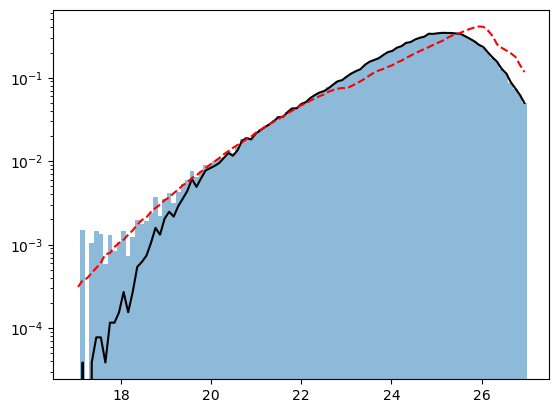

In [8]:
rng = np.random.RandomState(1234)


prob = 1.0 / ratio_mag(cosmos["mag_i_dered"])
prob /= np.sum(prob)
sample = rng.choice(cosmos["mag_i_dered"], size=1000000, p=prob, replace=True)

fig, axs = plt.subplots(1, 1)

mag = (bes[:-1] + bes[1:]) / 2
axs.hist(sample, bins=bes, density=True, alpha=0.5, label="sampled")
axs.plot(mag, hcosmos, '-k', label="cosmos")
axs.plot(mag, hcardinal, '--r', label="mdet")
axs.set_yscale("log")

## Make a Bunch

In [9]:
# get the seeds
req = requests.get('https://raw.githubusercontent.com/des-science/y6-image-sims/main/args-y6.txt')

req.raise_for_status()

seed_dict = {}
for line in req.text.split('\n'):
    line = line.strip()
    if not line:
        continue
    line = line.split()
    seed_dict[line[0]] = [int(x) for x in line[1:]]

assert len(seed_dict) == 1000
for v in seed_dict.values():
    assert len(v) == 10

In [15]:
partial_fnames = """\
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.277.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.278.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.281.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.282.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.304.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.307.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.316.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.319.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.341.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.342.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.345.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.346.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.357.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.358.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.361.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.362.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.421.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.422.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.425.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.426.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.432.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.435.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.444.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.447.fits""".splitlines()

partial_fnames = [os.path.basename(fn) for fn in partial_fnames]

all_fnames = set(
    os.path.basename(fn)
    for fn in glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")
)
init_fnames = len(all_fnames)
all_fnames = all_fnames - set(partial_fnames)
assert len(all_fnames) == init_fnames - len(partial_fnames)
all_fnames = sorted(all_fnames)
all_fnames = [os.path.join("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/", fn) for fn in all_fnames]

cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

nside = 8
n_per_tile = 1
for tname, seeds in tqdm.tqdm(seed_dict.items(), ncols=80, total=len(seed_dict)):
    tile = (
        "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
        f"{tname}_g_pizza_cutter_info.yaml"
    )
    with open(tile) as f:
        info = yaml.safe_load(f)
    wcs = galsim.FitsWCS(info["image_path"], hdu=1)

    for seed_ind in range(n_per_tile):
        _seed = seeds[seed_ind]
        _rng = np.random.RandomState(_seed)

        find = int(_rng.choice(len(all_fnames)))
        pix = int(all_fnames[find].split(".")[-2])
        cardinal = fitsio.read(all_fnames[find])

        tcat = make_input_cosmos_cat(
            cosmos=cosmos,
            sim=cardinal,
            nside=nside,
            pix=pix,
            seed=_seed,
            wcs=wcs,
            dz=0.1,
            dustmap_fname="SFD_dust_4096.hsp",
        )

        msk = (
            (tcat["x_sim"] >= 250)
            & (tcat["x_sim"] <= 9750)
            & (tcat["y_sim"] >= 250)
            & (tcat["y_sim"] <= 9750)
            & (tcat["mag_i"] <= 25)
        )
        _nobj = np.sum(msk)
        assert _nobj > 40000
        assert _nobj < 80000
        # print("    # of objects:", np.sum(msk), flush=True)

        pth = os.path.join(
            os.path.expandvars("$PSCRATCH"),
            f"cosmos_simcat_v6_{tname}_seed{_seed}.fits",
        )

        fitsio.write(pth, tcat, clobber=True)
        os.system("chgrp des %s" % pth)
        os.system("chmod g+r %s" % pth)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]

-0.006259244626802621 0.13779093242610152 0.029387794250851584


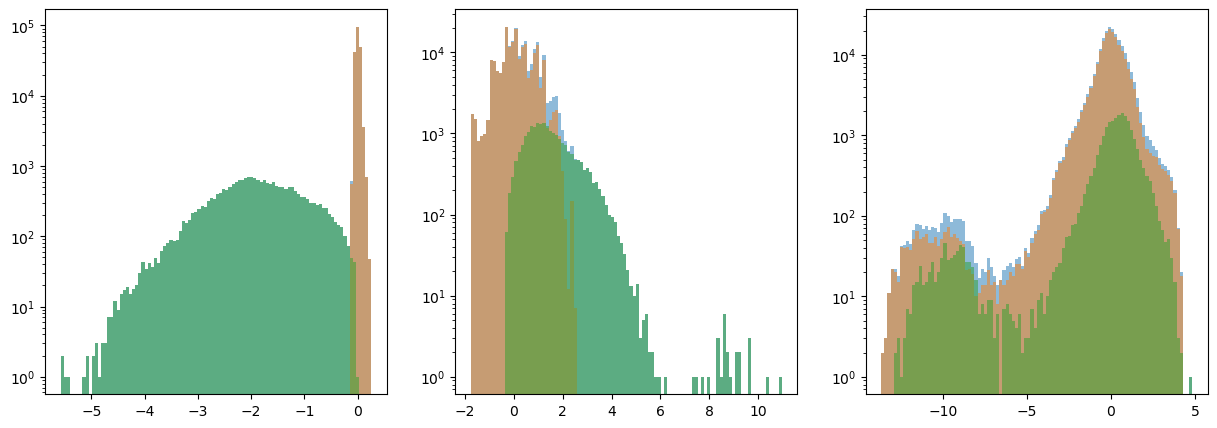

In [13]:
msk = tcat["cat_index_sim"] != -1
assert np.all(msk)
msk1 = (tcat["cat_index_sim"] != -1) & (tcat["match_type_sim"] == 1)
msk2 = (tcat["cat_index_sim"] != -1) & (tcat["match_type_sim"] == 2)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax = axs[0]
be = None
for _msk in [msk, msk1, msk2]:
    _dz = cardinal["Z"][tcat["cat_index_sim"][_msk]] - tcat["photoz"][_msk]
    _, be, _ = ax.hist(_dz, bins=100 if be is None else be, density=False, log=True, alpha=0.5)
    if _msk is msk:
        dz = _dz

ax = axs[1]
be = None
for _msk in [msk, msk1, msk2]:
    _di = cardinal["TMAG"][tcat["cat_index_sim"][_msk], 2] - tcat["mag_i_dered"][_msk]
    _, be, _ = ax.hist(_di, bins=100 if be is None else be, density=False, log=True, alpha=0.5)
    if _msk is msk:
        di = _di

ax = axs[2]
be = None
for _msk in [msk, msk1, msk2]:
    _dgmi = (
        (cardinal["TMAG"][tcat["cat_index_sim"][_msk], 0] - cardinal["TMAG"][tcat["cat_index_sim"][_msk], 2])
        - (tcat["mag_g_dered"][_msk] - tcat["mag_i_dered"][_msk])
    )
    _, be, _ = ax.hist(_dgmi, bins=100 if be is None else be, density=False, log=True, alpha=0.5)
    if _msk is msk:
        dgmi = _dgmi

print(np.median(dz), np.median(di), np.median(dgmi))

In [ ]:
np.unique(tcat["match_type_sim"])

## Try the New CLI Utils and Functions

In [ ]:
from montara.make_input_desgal import make_input_cosmos_cat

In [ ]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")
find = 0
cardinal = fitsio.read(fnames[find])
nside = 8
pix = int(fnames[find].split(".")[-2])

cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

with open(
    "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
    "DES0000-0250_g_pizza_cutter_info.yaml",
    "r",
) as fp:
    info = yaml.safe_load(fp)
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

In [ ]:
seed = 10

rng = np.random.RandomState(seed)

for i in range(10):
    _seed = rng.randint(1, 2 ** 28)

    tcat = make_input_cosmos_cat(
        cosmos=cosmos,
        sim=cardinal,
        nside=nside,
        pix=pix,
        seed=_seed,
        wcs=wcs,
        dz=0.1,
        di=0.5,
        dgmi=0.5,
        dustmap_fname="SFD_dust_4096.hsp",
    )

    msk = (
        (tcat["x_sim"] >= 250)
        & (tcat["x_sim"] <= 9750)
        & (tcat["y_sim"] >= 250)
        & (tcat["y_sim"] <= 9750)
        & (tcat["mag_i"] <= 25)
    )
    print("# of objects:", np.sum(msk), flush=True)

    pth = os.path.join(
        os.path.expandvars("$PSCRATCH"),
        "cosmos_simcat_DES0000-0250_seed%d.fits" % _seed,
    )

    fitsio.write(pth, tcat, clobber=True)
    os.system("chgrp des %s" % pth)
    os.system("chmod g+r %s" % pth)

In [ ]:
tcat.shape

In [ ]:
msk = (
    (tcat["x_sim"] >= 250)
    & (tcat["x_sim"] <= 9750)
    & (tcat["y_sim"] >= 250)
    & (tcat["y_sim"] <= 9750)
    & (tcat["mag_i"] <= 25)
)
np.sum(msk)

In [ ]:
msk = tcat["cat_index_sim"] != -1

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax = axs[0]
dz = cardinal["Z"][tcat["cat_index_sim"][msk]] - tcat["photoz"][msk]
ax.hist(dz, bins=100, density=True, log=True)

ax = axs[1]
di = cardinal["TMAG"][tcat["cat_index_sim"][msk], 2] - tcat["mag_i_dered"][msk]
ax.hist(di, bins=100, density=True, log=True)

ax = axs[2]
dgmi = (
    (cardinal["TMAG"][tcat["cat_index_sim"][msk], 0] - cardinal["TMAG"][tcat["cat_index_sim"][msk], 2])
    - (tcat["mag_g_dered"][msk] - tcat["mag_i_dered"][msk])
)
ax.hist(dgmi, bins=100, density=True, log=True)

print(np.median(dz), np.median(di), np.median(dgmi))

## Plot a Sim and Test Rotations

In [ ]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")

In [ ]:
fnames[0]

In [ ]:
d = fitsio.read(fnames[0])

In [ ]:
d.dtype.names

In [ ]:
nside = 8
pix = int(fnames[0].split(".")[-2])

fig, axs = plt.subplots()

msk = d["AMAG"][:, 2] < -23.75

axs.plot(d["TRA"][msk], d["TDEC"][msk], ".")

rab, decb = hpgeom.boundaries(
    nside,
    pix,
    nest=True,
    step=10,
)

for i in range(rab.shape[0]):
    ip1 = (i+1) % rab.shape[0]
    axs.plot(
        [rab[i], rab[ip1]],
        [decb[i], decb[ip1]],
        color="k",
    )

In [ ]:
import yaml

with open(
    "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
    "DES0000-0250_g_pizza_cutter_info.yaml",
    "r",
) as fp:
    info = yaml.safe_load(fp)

In [ ]:
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

In [ ]:
rac, decc = hpgeom.pixel_to_angle(nside, pix)

new_ra, new_dec, _, _ = project_to_tile(
    d["TRA"][msk],
    d["TDEC"][msk],
    rac,
    decc,
    wcs,
)

In [ ]:
fig, axs = plt.subplots()

axs.set_aspect("equal")
axs.plot(new_ra, new_dec, ".")

xv = np.array([1, 1, 10000, 10000])
yv = np.array([1, 10000, 10000, 1])

rav, decv = wcs.xyToradec(xv, yv, units=galsim.degrees)

for i in range(rav.shape[0]):
    ip1 = (i+1) % rav.shape[0]
    axs.plot(
        [rav[i], rav[ip1]],
        [decv[i], decv[ip1]],
        "-k",
    )


In [ ]:
fig, axs = plt.subplots()

ra, dec = sample_from_pixel(nside, pix, size=1000000)

rac, decc = hpgeom.pixel_to_angle(nside, pix)

new_ra, new_dec, _, _ = project_to_tile(
    ra,
    dec,
    rac,
    decc,
    wcs,
)
axs.hexbin(new_ra, new_dec, bins=100)

In [ ]:
fig, axs = plt.subplots()

ra, dec = sample_from_pixel(nside, pix, size=1000000)

axs.hexbin(ra, dec, bins=100)

rab, decb = hpgeom.boundaries(
    nside,
    pix,
    nest=True,
    step=10,
)

for i in range(rab.shape[0]):
    ip1 = (i+1) % rab.shape[0]
    axs.plot(
        [rab[i], rab[ip1]],
        [decb[i], decb[ip1]],
        color="k",
    )

## Now Try to Sample and Match a Cosmos "insta" Catalog

In [ ]:
d = fitsio.read(fnames[0])

In [ ]:
# catalog_sampler:
#   file_name: /dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits
#   cuts:
#     mag_i: [15., 25.]  # use only 15<mag_i<25. for now.
#     isgal: [1,]  # select galaxies only since we're simulating stars separately.
#     mask_flags: [0,]  # apply mask flags
#     bdf_hlr: [0., 5.]
cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

In [ ]:
cosmos.dtype.names

In [ ]:
cmsk = (
    (cosmos["mag_i"] > 15)
    & (cosmos["mag_i"] <= 25)
    & (cosmos["isgal"] == 1)
    & (cosmos["mask_flags"] == 0)
    & (cosmos["bdf_hlr"] > 0)
    & (cosmos["bdf_hlr"] <= 5)
)
cosmos = cosmos[cmsk]

In [ ]:
mn_ndraw = 170_000
seed = 10
rng = np.random.RandomState(seed=seed)
ndraw = rng.poisson(mn_ndraw)
cinds = rng.choice(cosmos.shape[0], size=ndraw, replace=True)

In [ ]:
tcat = cosmos[cinds]

In [ ]:
fig, axs = plt.subplots()

axs.hist(tcat["photoz"], bins=100, density=True);
axs.hist(d["Z"], density=True, bins=100, alpha=0.5)

fig, axs = plt.subplots()

axs.hist(tcat["mag_i_dered"], bins=100, log=True, density=True, alpha=0.5);
axs.hist(d["TMAG"][:, 2], density=True, bins=100, alpha=0.5)
axs.xaxis.set_inverted(True)

In [ ]:
%%time

rac, decc = hpgeom.pixel_to_angle(nside, pix)
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

new_ra, new_dec, new_x, new_y = project_to_tile(
    d["TRA"],
    d["TDEC"],
    rac,
    decc,
    wcs,
)

tmsk = (
    (new_x >= 0.5)
    & (new_x <= 10000.5)
    & (new_y >= 0.5)
    & (new_y <= 10000.5)
)

In [ ]:
fig, axs = plt.subplots()

axs.set_aspect("equal")
axs.plot(new_ra[tmsk][0:1000], new_dec[tmsk][0:1000], ".")

xv = np.array([1, 1, 10000, 10000])
yv = np.array([1, 10000, 10000, 1])

rav, decv = wcs.xyToradec(xv, yv, units="degrees")

for i in range(rav.shape[0]):
    ip1 = (i+1) % rav.shape[0]
    axs.plot(
        [rav[i], rav[ip1]],
        [decv[i], decv[ip1]],
        "-k",
    )


In [ ]:
from sim_match_tools import match_cosmos_to_cardinal

match_inds, match_flags = match_cosmos_to_cardinal(tcat, d[tmsk], max_dz=0.1, max_di=0.1, max_dgmi=0.1, rng=10)

In [ ]:
dtmsk = d[tmsk]

msk = match_inds != -1

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax = axs[0]
dz = dtmsk["Z"][match_inds[msk]] - tcat["photoz"][msk]
ax.hist(dz, bins=100, density=True, log=True)

ax = axs[1]
di = dtmsk["TMAG"][match_inds[msk], 2] - tcat["mag_i_dered"][msk]
ax.hist(di, bins=100, density=True, log=True)

ax = axs[2]
dgmi = dtmsk["TMAG"][match_inds[msk], 0] - dtmsk["TMAG"][match_inds[msk], 2] - (tcat["mag_g_dered"][msk] - tcat["mag_i_dered"][msk])
ax.hist(dgmi, bins=100, density=True, log=True)

print(np.median(dz), np.median(di), np.median(dgmi))

In [ ]:
msk = match_inds != -1

fig, axs = plt.subplots()

zbins = np.linspace(0, 6, 100)
axs.hist(d["Z"], density=False, bins=zbins, alpha=0.5, weights=np.ones(d.shape[0]) / d.shape[0] * tcat.shape[0])
axs.hist(tcat["photoz"], bins=zbins, density=False, alpha=0.5)
axs.hist(tcat["photoz"][msk], bins=zbins, alpha=0.5, density=False)

fig, axs = plt.subplots()

mbins = np.linspace(15, 27, 100)
axs.hist(d["TMAG"][:, 2], density=False, bins=mbins, alpha=0.5, weights=np.ones(d.shape[0]) / d.shape[0] * tcat.shape[0])
axs.hist(tcat["mag_i_dered"], bins=mbins, log=True, density=False, alpha=0.5)
axs.hist(tcat["mag_i_dered"][msk], bins=mbins, log=True, density=False, alpha=0.5)
axs.xaxis.set_inverted(True)

In [ ]:
import os
import subprocess

import esutil.numpy_util
import healsparse


def _compute_dered_flux_fac(i, ebv_map_val):
    """This function computes the dereddening factor for the flux.

    Eli says we cannot apply the correction to the asinh mag.

    You use like this:

        dered_flux = flux * _compute_dered_flux_fac(i, map)

    Parameters
    ----------
    i : int
        The index of the band in griz (i.e., 0 for g, 1 for r, 2 for i, 3 for z).
    ebv_map_val : float or np.ndarray
        The E(B-V) value(s) from the dust map.

    Returns
    -------
    dered_flux : float or np.ndarray
        The dereddened flux.
    """

    dered_fac = [3.186, 2.140, 1.196, 1.048]
    dmag = dered_fac[i] * ebv_map_val
    return 10**(dmag / 2.5)


def _read_hsp_file(fname):
    mpth = _get_hsp_file_path(fname)
    return healsparse.HealSparseMap.read(mpth)


def _read_hsp_file_local(fname):
    return healsparse.HealSparseMap.read(fname)


def _get_hsp_file_path(fname):
    # get or make meds dir
    meds_dir = os.environ.get("MEDS_DIR", None)
    if meds_dir is None:
        meds_dir = os.path.expandvars(
            os.path.expanduser("~/MEDS_DIR")
        )
        os.makedirs(meds_dir, exist_ok=True)

    # download if needed
    fpth = os.path.join(meds_dir, fname)
    if not os.path.exists(fpth):
        _download_fname_from_bnl(fpth)

    return fpth


def _download_fname_from_bnl(fpth):
    fdir, fname = os.path.split(fpth)

    wget_res = subprocess.run("which wget", shell=True, capture_output=True)
    curl_res = subprocess.run("which curl", shell=True, capture_output=True)

    base_urls_to_try = [
        "https://www.cosmo.bnl.gov/www/esheldon/data/y6-healsparse",
    ]

    if wget_res.returncode == 0:
        for bnl in base_urls_to_try:
            ret = subprocess.run(
                "cd %s && wget %s/%s" % (
                    fdir, bnl, fname,
                ),
                shell=True,
                capture_output=True,
            )
            if ret.returncode == 0:
                break

        ret.check_returncode()

    elif curl_res.returncode == 0:
        for bnl in base_urls_to_try:
            ret = subprocess.run(
                "cd %s && curl -L %s/%s --output %s" % (
                    fdir, bnl, fname, fname,
                ),
                shell=True,
                capture_output=True,
            )
            if ret.returncode == 0:
                break

        ret.check_returncode()

    else:
        raise RuntimeError(
            "Could not download mask '%s' from BNL due "
            "to wget or curl missing!" % fname,
        )


dtmsk = d[tmsk]

final_tcat = esutil.numpy_util.add_fields(
    tcat,
    [
        ("ra_sim", "f8"),
        ("dec_sim", "f8"),
        ("x_sim", "f8"),
        ("y_sim", "f8"),
        ("sim_match_flags", "i4"),
        ("mag_g_red_sim", "f8"),
        ("mag_r_red_sim", "f8"),
        ("mag_i_red_sim", "f8"),
        ("mag_z_red_sim", "f8"),
    ]
)
final_tcat["ra_sim"] = new_ra[tmsk][match_inds]
final_tcat["dec_sim"] = new_dec[tmsk][match_inds]
final_tcat["x_sim"] = new_x[tmsk][match_inds]
final_tcat["y_sim"] = new_y[tmsk][match_inds]
final_tcat["sim_match_flags"] = match_flags

bands = ['g', 'r', 'i', 'z']
dustmap = _read_hsp_file("SFD_dust_4096.hsp")

dered = dustmap.get_values_pos(final_tcat["ra_sim"], final_tcat["dec_sim"])
for ii, b in enumerate(bands):
    dered_fac = _compute_dered_flux_fac(ii, dered)
    red_shift = 2.5 * np.log10(dered_fac)
    final_tcat["mag_" + b + "_red_sim"] = final_tcat["mag_" + b + "_dered"] + red_shift

In [ ]:
final_tcat["mag_z_red_sim"][0:10]

In [ ]:
final_tcat["mag_z_dered"][0:10]

In [ ]:
!ls $PSCRATCH

In [ ]:
pth = os.path.join(
    os.path.expandvars("$PSCRATCH"),
    "cosmos_simcat_DES0000-0250_seed10.fits",
)

fitsio.write(pth, final_tcat, clobber=True)

In [ ]:
final_tcat.dtype.names

## Code for Hacking

In [ ]:
match_inds = match_cosmos_to_cardinal(tcat, d[tmsk], photo_scale_factor=3, max_radius=0.5)

In [ ]:
match_inds = match_cosmos_to_cardinal(tcat, d[tmsk], photo_scale_factor=3, max_nbrs=500)

In [ ]:
match_inds = match_cosmos_to_cardinal(tcat, d[tmsk], photo_scale_factor=3, max_nbrs=100)

In [ ]:
tdata = np.zeros((int(np.sum(tmsk)), 3))
tdata[:, 0] = d["TMAG"][tmsk, 1]  # r-band
tdata[:, 1] = d["TMAG"][tmsk, 0] - d["TMAG"][tmsk, 2]  # g-i color
# tdata[:, 2] = d["TMAG"][tmsk, 2] - d["TMAG"][tmsk, 3] # i-z color
tdata[:, 2] = d["Z"][tmsk] * 10

In [ ]:
tree = cKDTree(tdata)

In [ ]:
cmsk = tcat["photoz"] < 2.3
nk = 1000

cx = np.zeros((int(np.sum(cmsk)), 3))
cx[:, 0] = tcat["mag_r_dered"][cmsk]
cx[:, 1] = tcat["mag_g_dered"][cmsk] - tcat["mag_i_dered"][cmsk]
# cx[:, 2] = tcat["mag_i_dered"] - tcat["mag_z_dered"]
cx[:, 2] = tcat["photoz"][cmsk] * 10
dd, ii = tree.query(cx, k=nk)

In [ ]:
np.unique(ii[:, 0:nk]).shape, np.sum(cmsk)

In [ ]:
fig, axs = plt.subplots()

axs.hexbin(tcat[cmsk]["mag_i_dered"], tcat[cmsk]["photoz"], bins="log")

fig, axs = plt.subplots()

axs.hexbin(d[tmsk]["TMAG"][:, 2], d[tmsk]["Z"], bins="log")

In [ ]:
axs.hexbin?

In [ ]:
list(range(3, 1, -1))